In [2]:

import tensorflow as tf
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [3]:

#define the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])


In [4]:
# compile the keras model
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

img_rows, img_cols, channels = 28, 28, 1
num_classes = 10

x_train = x_train / 255
x_test = x_test / 255

print("Data shapes", x_test.shape, y_test.shape, x_train.shape, y_train.shape)


11493376/11490434 [==============================] - 1s 0us/step
Data shapes (10000, 28, 28) (10000,) (60000, 28, 28) (60000,)


In [6]:
# fit the keras model on the dataset
model.fit(x_train, y_train,
          batch_size=32,
          epochs=20,
          validation_data=(x_test, y_test))

# evaluate the keras model
train_loss, train_acc = model.evaluate(x_train,  y_train, verbose=2)
# evaluate the keras model
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTrain accuracy:', train_acc)
print('\nTest accuracy:', test_acc)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2526 - accuracy: 0.9282 - val_loss: 0.1327 - val_accuracy: 0.9618
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1101 - accuracy: 0.9672 - val_loss: 0.0944 - val_accuracy: 0.9710
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0765 - accuracy: 0.9767 - val_loss: 0.0916 - val_accuracy: 0.9727
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0563 - accuracy: 0.9831 - val_loss: 0.0773 - val_accuracy: 0.9772
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0444 - accuracy: 0.9856 - val_loss: 0.0742 - val_accuracy: 0.9779
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0340 - accuracy: 0.9899 - val_loss: 0.0759 - val_accuracy: 0.9773
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0282 - accuracy: 0.9913 - val_loss: 0.0772 - val_accuracy:

In [7]:

test_predictions = model.predict(x_test)
train_predictions = model.predict(x_train)

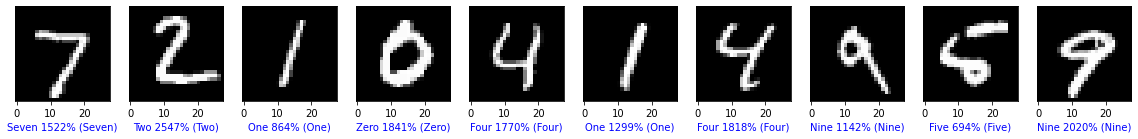

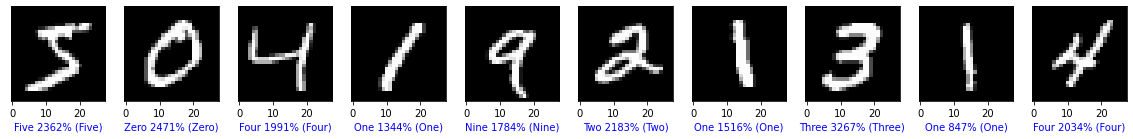

In [8]:
class_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

def display_images(images, predicted_labels, true_labels):
    n = 10  # How many digits we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(images[i].reshape(28, 28))
        plt.gray()
        ax.get_yaxis().set_visible(False)

        predicted_label = np.argmax(predicted_labels[i])

        if predicted_label == true_labels[i]:
          color = 'blue'
        else:
          color = 'red'

        plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                      100*np.max(predicted_labels[i]),
                                      class_names[true_labels[i]]),
                                      color=color)


    plt.show()

display_images(x_test, test_predictions, y_test)
display_images(x_train, train_predictions, y_train)